
<font size="8" color ="Brown"><center>
# Lecture 8 Video Coding Transforms, KLT, DCT 
        
<center></font>
<br>

<font size="8" color ="Brown"><center>
# Optimum Transforms, KLT 
        
<center></font>
<br>
<p style="line-height:1.5">
<font size="6">

Previously we chose a DCT (the 2-dimensional DCT where we multiply a DCT from both sides) as a transform matrix. But the next question is, how do we choose a suitable, or **optimum**, **transform matrix**, out of the many possible? The ultimate goal of a video coder is to save bits, so we would like to have a transform matrix, which leads to a **minimized number of bits** for describing or coding an image. In a complete coder we apply irrelvance reduction (the properties of the eye), and redundancy reduction (properties of the source). Since this becomes somewhat difficult to solve for a simple transform matrix, we **simplify our problem** by looking at the properties of the source only (meaning **redundancy reduction** only or lossless coding). To minimize the needed bits for the lossless case is still mathematically a hard problem.<br><br> 

Hence we reformulate our problem: we would like the subband signals to be **statistically independent** of each other, or no **mutual information**.  Statistical independence of signals x and y means: probablity p(x) is the same as this probability conditioned to the other signal y: p(x)=p(x|y), which means **x contains no information about y**, which is what we actually want to avoid additional redundancys in our transmitted signal, to transmit information only once. Independence leads to uncorrelatedness, but uncorrelatedness leads not necessarily to independence, only for **gaussian distributed** signals. We obtain gaussian signals for instance if we add up many more or less random signals (law of large numbers, central limit theorem).
<br><br>
But this statistical independence is again hard, and hence we choose the easier to obtain **uncorrelatedness** between the different subbands. We again reformulate our goal that we would like to have subbands $\boldsymbol {y_k} (m)$, which are **uncorrelated** to each other (instead of the lowest number of bits).  This means that $E(\boldsymbol y_k(m).\boldsymbol y_l(m))=0$ for $k \neq l$, with $k$ and $l$ being different subband indices. This is a correlation between 2 subbands with correlation lag equal to zero (which is another restriction or simplification!). This means different subbands shall be uncorrelated, meaning each subband should carry new information.
<br>
<br>
In this way we can argue that we have minimized redundancy between the subbands in some respect (for gaussian signals), to obtain some sort of information separation between the subbands. In this way we have made this problem **mathematically more tractable**.
<br><br>
First assume a **one dimensional** signal **x** (like an audio signal or the rows of an image), to simplify our notation. This signal is again divided into blocks of length N, obtaining blocks $\boldsymbol x(m)$, with block index $m$, and then each block is transformed using our transform matrix $\boldsymbol T$,
<br>
    $$\boldsymbol y(m)=\boldsymbol x(m).\boldsymbol T$$
where $\boldsymbol y(m)$ is a row vector . These vectors can now be assembled into a matrix, where the block index $m$ runs vertically,<br>    
    

</font></p>    

<p style="line-height:1.5">
<font size="6">
<br>
     $$
    \boldsymbol  X=\left[\matrix{ x_0(0) & x_1(0) &... &x_{N-1}(0)\\  x_0(1) & x_1(1)&...&x_{N-1}(1)  \\x_0(2)&...&\vdots&...\\ \vdots & ...&\vdots&\vdots \\ x_{0}(L-1)&...&...&...} \right]
    $$

<br>
     $$
    \boldsymbol  Y=\left[\matrix{ y_0(0) & y_1(0) &... &y_{N-1}(0)\\  y_0(1) & y_1(1)&...&y_{N-1}(1)  \\y_0(2)&...&\vdots&...\\ \vdots & ...&\vdots&\vdots \\ y_{0}(L-1)&...&...&...} \right]
    $$
</font></p>

<p style="line-height:1.5">
<font size="6">
   $\boldsymbol X$ and $\boldsymbol Y$ are  matrices of size LxN, where L is the number of blocks in the signal, and with it out transform equation becomes<br><br>
   $$\boldsymbol Y=\boldsymbol X . \boldsymbol T$$


The columns of the matrix $\boldsymbol Y$ contain the signals of the different subbands (one column is one subband, first column subband k=0, second column subband k=1..., so vertically we have the subband view). We would like to compute the correlations between the different subbands (at time lag 0 to again simplify matters), to obtain a transform matrix where this will be zero.  We now obtain the correlation matrix of the subbands by multiplying the different subband column vectors (column vector of subband k=0 with itself results in its signal power, product of subband k=0 with k=1 results in their cross-correlation with lag 0...), if we multiply the transpose with the matrix (in this way each subband column becomes a row from the left, which we then multiply with each subband column on the right),<br>
</font></p>

<p style="line-height:1.5">
<font size="5">
    
    $$\boldsymbol Y^T .\boldsymbol Y=$$
    $$\left[\matrix{ y_0(0) & ...&y_{0}(L-1) \\ \vdots & ...&\vdots \\ y_{N-1}(0)&...&y_{N-1}(L-1)} \right] . \left[\matrix{ y_0(0) & ...&y_{N-1}(0) \\ \vdots& ...&\vdots\\ y_{0}(L-1)&...&y_{N-1}(L-1)} \right]$$
</font></p>


<p style="line-height:1.5">
<font size="6">
which we name $\boldsymbol A_{yy}$,<br>
    $$\boldsymbol A_{yy}=\boldsymbol Y^T.\boldsymbol Y (eq. 2)
$$
The element at position i,j of matrix $\boldsymbol A_{yy}$ is
<br>
$$\sum _{ m=0 } ^ { L-1 } y_i(m ) . y_j( m ) $$
Hence $\boldsymbol A_{yy}$ is a NxN matrix, which now contains the **autocorrelation and cross correlations** of the different subbands at lag 0. On the resulting matrix $\boldsymbol A_{yy}$, each **diagonal element contains the power** of the corresponding subband, and the **off-diagonal** elements contain the cross-correlation of the corresponding subbands, which we **want to be zero**.<br><br>
To obtain our goal of uncorrelated subbands, this correlation matrix needs to be a diagonal matrix. 
<br>
$$\boldsymbol A_{yy}=\left[\matrix{\sigma_0^2 &0 & 0  \\0  & \ddots &\vdots \\ 0&...&\sigma^2_{N-1}} \right] $$


So we need to find a solution which satisfies this goal. We stack our signal into the size LxN matrix $\boldsymbol X$ (as above), 
<br>
$$\boldsymbol X=\left[\matrix{ x(0) &...& x(N-1) \\x(N) &...& x(2N-1)  \\x(2N) &...& x(3N-1) \\ \vdots &\vdots &\vdots} \right]
$$

<br>

In this way we obtain the subband values as
<br>
$$\boldsymbol Y=\boldsymbol X.\boldsymbol T $$
plugging this result into eq. (2) we obtain<br><br>

$$\boldsymbol A_{yy}= \boldsymbol Y^T \cdot \boldsymbol Y=(\boldsymbol X \cdot \boldsymbol T)^T \cdot \boldsymbol X \cdot \boldsymbol T = \boldsymbol T^T \cdot \boldsymbol  {X^T \cdot \boldsymbol X}   \cdot \boldsymbol T$$

<br>
Here we can observe that $\boldsymbol X^T.\boldsymbol X$ is the autocorrelation matrix of our signal blocks in the signal x,
<br><br>
$$
\boldsymbol A_{xx}:=\boldsymbol X^T.\boldsymbol X
$$
(Remember that the **autocorrelation function** of a signal x is defined as,<br> 

$r_{xx}(n)=\sum_{n'}  x(n') . x(n'-n)$, and the cross correlation between two signals x and y is $r_{xy}(n)=\sum_{n'}^{}  x(n') . y(n'-n)$, and for lag n=0 this corresponds to the usual vector multiplication).<br>
Observe that **X** contains the **blocks** of the signal x, which we here assume to be one-dimensional, for simplicity. Each row is one block of our 1-dimensional signal, for instance a block of a line of our image. This means that each column corresponds to one position in each block, over the block index m. In effect this is a **downsampled** signal x along each column of matrix $\boldsymbol X$, where each column corresponds to a different **phase** (instead of a different subband) of the downsampled signal. This means the correlation matrix $\boldsymbol A_{xx}$ corresponds to the correlations of the different downsampled versions of x (usually there will be a lot of correlation).<br>
Remember that our goal was to make $\boldsymbol A_{yy}$ a diagonal matrix, which is equivalent to the subband signals being uncorrelated. <br><br>

Observe that we now have
<br>$$
\boldsymbol A_{yy}={\boldsymbol T}^{T} . \boldsymbol A_{xx} . \boldsymbol T
$$ 
Given matrix $\boldsymbol A_{xx}$ we need to **determine** the **transform matrix** $\boldsymbol T$ such that $\boldsymbol A_{yy}$ becomes a **diagonal matrix**. The advantage now is that $\boldsymbol A_{xx}$ is much smaller than $\boldsymbol X$, it has a finite dimension, it is quadratic with dimension NxN, and hence we can easily find a solution. Now we can see that if we only had one transform matrix (from just one side), it would only need to be the inverse of $\boldsymbol A_{xx}$ in order to get a diagonal matrix, since we would obtain the identity matrix, which is also a diagonal matrix. But we have the transform from both sides, so that doesn't work. So let's take a look at the Eigenvectors of $\boldsymbol A_{xx}$. An Eigenvector has the property that a multiplication of it with the matrix results in the same vector, but multiplied with the Eigenvalue:<br>
$$
\boldsymbol A_{xx} \cdot \boldsymbol e_0^T=\lambda_0 \cdot \boldsymbol e_0^T
$$
Also, since our matrix is symmetric, the Eigenvectors are orthogonal to each other, meaning $\boldsymbol e_j \cdot \boldsymbol e^T_k=0$ for $j \neq k$, and $\boldsymbol e_i \cdot \boldsymbol e^T_i=1$
<br><br>

Hence, we construct our transform matrix $\boldsymbol T$ as having all Eigenvectors $e_k$ of $\boldsymbol A_{xx}$ as its columns,
<br>

$$
\boldsymbol T= \left[\matrix{\boldsymbol e_0^T & | & \boldsymbol e_1^T & | & ..& | & \boldsymbol e_{N-1}^T} \right]
$$
(important step!) This means that if we multiply this matrix from the right side to $\boldsymbol A_{xx}$ we obtain the same Eigenvectors, but multiplied with their Eigenvalues $\lambda_k$.  
<br><br>
$$
\boldsymbol A_{ xx } . \boldsymbol T =\left[\matrix{\lambda_0 . \boldsymbol e_0^T& | & \lambda_1 . \boldsymbol e_1^T & | & ...& |& \lambda_{N-1} . \boldsymbol e_{N-1}^T} \right]
$$<br>
(since we had )$\boldsymbol A_{xx} . \boldsymbol e_j^T=\lambda_j . \boldsymbol e_j^T$. Since the $e_j$ are orthogonal to each other, all what is left after the multiplication from the left hand side with $\boldsymbol T^T$
(which has the eigenvectors in the rows), is a diagonal matrix! The diagonal elements now contain the Eigenvalues ($\boldsymbol e_j . \lambda_j . \boldsymbol e_j^T=\lambda_j$),
    </font></p>

<p style="line-height:1.5">
<font size="6">
<br>


$$
\boldsymbol A_{yy}=\boldsymbol T ^T \cdot \boldsymbol A _{xx}.\boldsymbol T=$$
$$=\left[\matrix{\lambda_0 & 0 & 0 & ... & 0 \\ 0 & \lambda_1 & 0 & .. & 0 \\ \vdots & ... & ... & .. & \vdots \\ 0 & 0 & ... & 0 & \lambda_{N-1}
}\right]$$

where $\lambda_j$ are the Eigenvalues of $\boldsymbol A_{xx}$.
<br><br>
Observe that here we **achieved our goal** of a diagonal matrix as $\boldsymbol A_{yy}$ for the uncorrelatedness of the subbands, using $\boldsymbol T$ as a set of **eigen-vectors** of $\boldsymbol A_{xx}$!

</font></p>

<p style="line-height:1.5">
<font size="6">
<br><br>
**In conclusion:** for one-dimensional signals with the matrix of signal blocks $\boldsymbol X$ the decorrelating transform is $\boldsymbol T$, and the uncorrelated subbands are obtained with
$$\boldsymbol Y=\boldsymbol X.\boldsymbol T$$
<br>
 This means we now reached our goal of diagonalizing our cross correlation matrix $\boldsymbol A_{yy}$ with a transform matrix which consists of the **Eigenvectors** of autocorrelation matrix $\boldsymbol A_{xx}$ in its **columns**! This is now the so-called **Karhunen-Loeve Transform (KLT)**. (Also see e.g. <br> http://fourier.eng.hmc.edu/e161/lectures/klt/node3.html),
(also called Principal Component Analysis, PCA, or Hotelling Transform).
<br><br>
In this way we obtain **one KLT** matrix for the **rows** of our picture, and one KLT matrix for the **columns** (hence two KLT matrices for the entire picture). The KLT for the rows is obtained of assembling **all** the rows of all blocks in a **picture** or set of pictures into the matrix $\boldsymbol X$, use it  to compute the correlation matrix $\boldsymbol A_{xx}$, and then compute the eigenvectors to obtain the KLT as the set of these eigenvectors. Similarly, the **KLT for the columns** is obtained by assembling all columns of all blocks into a matrix $\boldsymbol X$.
<br><br>
The problem with the KLT is, that it doesn't have a **fast implementation**, like a DCT, which can be implemented via an FFT. Also, if we want to have the optimal KLT for our image (or set of images), we would have to calculate it first, and then transmit it as **side-information** to the decoder, which would increase the necessary bit rate. This has the consequence that it is usually only a theoretical construct, but not really used in practical coders. 
<br><br>
Observe that for the construction of the KLT we need useful, **reliable statistics**, and hence many blocks to compute our correlation matrix $\boldsymbol A_{xx}$ from. Hence we need to compute the correlation matrix from all blocks of an image, or from all blocks of a **collection of images or a video.**
</front></p>

<font size="8" color ="Brown"><center>
## Python Example Audio
        
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">For simplicity take a 1-dimensional signal, like an audio signal. We take a stereo recording with 2 different sources mixed together using panning (amplitude based mixing, no delays).
The original stereo mix has the following mutual probability distribution (each axis is the amplitude value of one of the stereo channels).
Each pair of samples of the 2 channels is a dot in the plot (hence strictly speaking it is a **scatter plot**, and only becomes a probability after normalization such that the integral over it becomes 1).<br>
    
    
![Lecture8-1.PNG](Img-Lecture8\Lecture8-1.PNG) 
<br>
The similarity (the correlation) of the 2 channels can be seen in the diagonal shape of the distribution.<br><br>
We can now apply the **KLT** to the **2 channels** of our mix, and obtain a 2x2 KLT matrix. Each pair of samples is multiplied with the 2x2 KLT matrix, to obtain new channel signals which are **uncorrelated**  between the 2 channels. The resulting mutual pdf can be seen in this plot:<br>


![Lecture8-2.PNG](Img-Lecture8\Lecture8-2.PNG)
<br>

We see the pdf is rotated, such that its axes are now **aligned with the axes** of the plot, which is a sign of **uncorrelatedness.**<br>
But now the 2 channels have very different amplitudes or powers. What will we see if we make the the powers of the 2 channels equal, by normalizing them to 1? We do this by dividing the KLT subbands by the square roots of their Eigenvalues (which are the powers of these subbands). This is called **“Whitening”** and can be seen in the next plot:<br><br>
![Lecture8-3.PNG](Img-Lecture8\Lecture8-3.PNG)
<br>

Here we can now recognize, that there are still diagonal structures. This means there are still dependencies between the 2 channels left (observe the **difference** between **correlation** and **dependencies**). <br>
This leads us to Independent Component Analysis (ICA). It again rotates the mutual pdf, now for the “whitened” channels, such that its structures are aligned with the plot axes. It constructs a rotation matrix (**Givens Rotation,** https://en.wikipedia.org/wiki/Givens_rotation) 
<br><br>
$$
\left[ \matrix{cos(\alpha) & sin(\alpha) \\ -sin(\alpha) & cos(\alpha)} \right] 
$$
and chooses its **angle**  for the 2 channels which **maximizes the non-gausianity**; or the **entropy differences** (making channels as different as possible) or the **Kurtosis (4th moment)** of the resulting channel signals (which to take is your choice).<br> 
(see e.g. <br>https://en.wikipedia.org/wiki/Independent_component_analysis)
<br>The first criteria is based on the observation that a **sum** of random samples becomes **more gaussian** (normal distribution) than the **original samples** (central limit theorem, see e.g.<br> https://en.wikipedia.org/wiki/Central_limit_theorem).<br>
Hence the original samples must be **less gaussian**. This can also be seen as minimizing the **mutual information**<br> (https://en.wikipedia.org/wiki/Mutual_information).<br>
The mutual information or the similarity to a gaussian pdf can be measure by the so-called **“Kullback–Leibler divergence”**<br> (https://en.wikipedia.org/wiki/Kullback-Leibler_divergence).<br> For 2 pdf’s P and Q, the Kullback-Leibler divergence is

$$
D_{ KL}(P,Q)=\sum_i P( i ) \cdot log \left( \frac{P(i)}  {Q(i)} \right)
$$


In Python: <br>
```scipy.stats.entropy()```

Q can be the gaussian distribution with variance 1 (since we normlized the signal to its power in the whitening step). We then sum the divergence of both channels to the gaussian distribution. This is a measure that can then be maximized using an optimization procedure (in python: ```scipy.optimize```). The resulting mutual pdf can be seen in the following plot:<br>

![Lecture8-4.PNG](Img-Lecture8\Lecture8-4.PNG)
<br>
Here we see that the new structure becomes indeed aligned with the plot axes. This alignment is what we see if 
$$p(channel1, channel2)=p(channel1) \cdot p(channel2)$$, 
which according to Bayes’ Theorem means that channel1 and channel2 are **statistical independent**. Hence these are now **independent** channel signals.
We can also listen to the resulting signals, using Python:<br>
```python ICAseparation.py```<br><br>

</font></p>

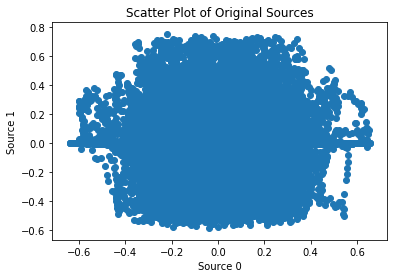

c:\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


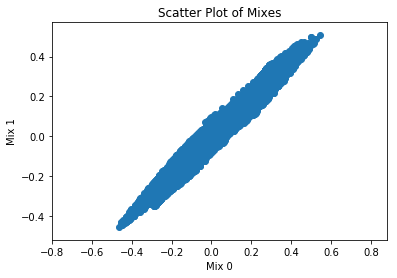

Lambda=  [0.00019831 0.02129976]


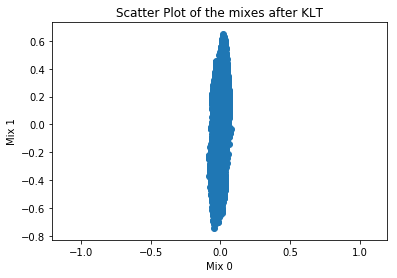

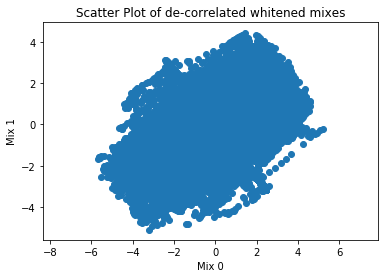

alpha=  0.0
similarity=  -0.184072786232046
alpha=  1.8
similarity=  -0.19049281114479147
alpha=  3.6
similarity=  -0.19761334467392264
alpha=  5.4
similarity=  -0.22598498140100529
alpha=  7.2
similarity=  -0.2490632166463387
alpha=  9.0
similarity=  -0.2810459332810128
alpha=  10.8
similarity=  -0.3042231566362263
alpha=  12.6
similarity=  -0.33722222426477366
alpha=  14.4
similarity=  -0.3717650786181904
alpha=  16.2
similarity=  -0.39701475117450796
alpha=  18.0
similarity=  -0.4263702793997962
alpha=  19.8
similarity=  -0.46157826047552053
alpha=  21.6
similarity=  -0.5136550932034526
alpha=  23.400000000000002
similarity=  -0.5871630152661019
alpha=  25.2
similarity=  -0.6635787303333283
alpha=  27.0
similarity=  -0.750641734053346
alpha=  28.8
similarity=  -0.8502531000042279
alpha=  30.6
similarity=  -0.9723917378159398
alpha=  32.4
similarity=  -1.1089789214678625
alpha=  34.2
similarity=  -1.2944558494231673
alpha=  36.0
similarity=  -1.616709358789325
alpha=  37.800000000000

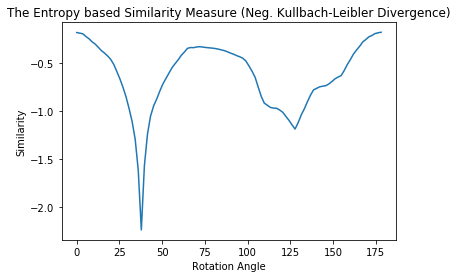

alpha=  68.75388202501892
similarity=  -0.3358993627694627
alpha=  111.24611797498108
similarity=  -0.9306030593854662
alpha=  137.50776405003785
similarity=  -0.8067032635089292
alpha=  115.71009210248394
similarity=  -0.9692939172148408
alpha=  120.53543005868005
similarity=  -1.0144934811703985
alpha=  127.01828477496356
similarity=  -1.1782044607827824
alpha=  131.02490933375432
similarity=  -1.0543872568938235
alpha=  126.1353743941287
similarity=  -1.146106791502834
alpha=  127.89828840516532
similarity=  -1.1845410234272553
alpha=  127.67599515214692
similarity=  -1.1908110324109336
alpha=  127.52516552086912
similarity=  -1.1907640762059244
alpha=  127.60261699932012
similarity=  -1.1916205397089297
alpha=  127.60164317218737
similarity=  -1.1912381590523076
alpha=  127.63829013365893
similarity=  -1.1916971911437133
alpha=  127.6526921691749
similarity=  -1.1917763832679154
alpha=  127.66159311663095
similarity=  -1.191953592627252
alpha=  127.66709420469087
similarity=  -1.19

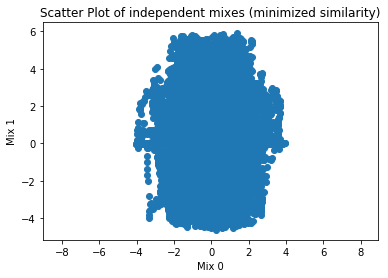

In [2]:

import numpy as np
import scipy.io.wavfile as wav
from numpy import linalg as LA
import matplotlib.pyplot as plt
import os
import pyaudio
import scipy.stats as stats
import scipy.optimize as opt

def playsound(audio, samplingRate, channels):

    p = pyaudio.PyAudio()
    # open audio stream

    stream = p.open(format=pyaudio.paInt16,
                    channels=channels,
                    rate=samplingRate,
                    output=True)

    sound = (audio.astype(np.int16).tostring())
    #sound = (audio.astype(np.int16).tostring())
    stream.write(sound)

    # close stream and terminate audio object
    stream.stop_stream()
    stream.close()
    p.terminate()
    return

def rotation_matrix(alpha):

    # Define rotation matrix
    #alpha = 0
    theta = np.radians(alpha)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    # print(R)

    return R

def entropysimilarity(alpha,X):
    print("alpha= ", alpha)
    R = rotation_matrix(alpha)
    X_prime = np.dot(X,R)
    hist0, bins =np.histogram(X_prime[:,0],bins=1000)
    hist1, bins =np.histogram(X_prime[:,1],bins=1000)
    similarity= -stats.entropy(hist0+1e-6,hist1+1e-6)
    print("similarity= ", similarity)
    return similarity

if __name__ == "__main__":
   #read in sources from stereo file:
   samplerate, sources = wav.read("Track48short2.wav")
   sources=sources*1.0/2**15
   #"""
   plt.scatter(sources[:,0],sources[:,1])
   plt.title('Scatter Plot of Original Sources')
   plt.xlabel('Source 0')
   plt.ylabel('Source 1')
   plt.show()
   os.system('espeak -s 120 "The original sources"');
   os.system('espeak -s 120 "Channel 0"')
   playsound(sources[:,0]*2**15, samplerate, 1)
   os.system('espeak -s 120 "Channel 1"')
   playsound(sources[:,1]*2**15, samplerate, 1)
   #"""
   #mix sources, like from panning, just factors, no delay, with a mixing matrix of factors,
   #one source a little to the left, the other a little to the right:
   a=0.45
   b = 1 - a
   A= np.array([[a, b], [b, a]])
   #Mixed sources X:
   X=np.dot(sources,A)
   #"""
   #Mix scatter plot:
   plt.scatter(X[:,0],X[:,1])
   plt.title('Scatter Plot of Mixes')
   plt.xlabel('Mix 0')
   plt.ylabel('Mix 1')
   plt.axes().set_aspect('equal', 'datalim')
   plt.show()
   #play mixed source:
   os.system('espeak -s 120 "The mixed sources, stereo"');
   playsound(X*2**15, samplerate, 2)
   #"""
   #ICA:
   #1st step: remove possible DC from mix:
   X= X- X.mean(axis=0)
   #2nd step: compute the Karhounen-Loew-Transform T for de-correlation of mixes:
   #Correlation matrix:
   Axx = np.dot(X.T, X)/X.shape[0]
   # print ("Axx: ", Axx)

   Lambda, T = LA.eig(Axx)
   print("Lambda= ", Lambda)
   #Perform KLT:
   X=np.dot(X,T)
   #"""
   #Scatter plot of mixes after KLT:
   plt.scatter(X[:,0],X[:,1])
   plt.title('Scatter Plot of the mixes after KLT')
   plt.xlabel('Mix 0')
   plt.ylabel('Mix 1')
   plt.axes().set_aspect('equal', 'datalim')
   plt.show()

   os.system('espeak -s 120 "The de-correlated mixes after KLT"');
   os.system('espeak -s 120 "Channel 0"')
   playsound(X[:,0]*2**15, samplerate, 1)
   os.system('espeak -s 120 "Channel 1"')
   playsound(X[:,1]*2**15, samplerate, 1)
   #"""

   #Normalize the powers of the de-correlated mixes, "whitening", by dividing by the square root of the Eigenvalues:
   
   #normalize the decorrelated mixes to their power::
   X= np.dot(X,np.diag(1.0/np.sqrt(Lambda)))
   #"""
   #Scatter plot of de-corellated and whitened mixes:
   plt.scatter(X[:,0],X[:,1])
   plt.title('Scatter Plot of de-correlated whitened mixes')
   plt.xlabel('Mix 0')
   plt.ylabel('Mix 1')
   plt.axes().set_aspect('equal', 'datalim')
   plt.show()

   os.system('espeak -s 120 "The de-correlated whitened mixes"');
   os.system('espeak -s 120 "Channel 0"')
   playsound(X[:,0]*2**12, samplerate, 1)
   os.system('espeak -s 120 "Channel 1"')
   playsound(X[:,1]*2**12, samplerate, 1)
   #"""
   #ICA Step 3: find rotation angle which minimizes entropy based similarity:
   #plot similarity over rotation angle:
   similarity=np.zeros(100)
   for n in np.arange(100):
       similarity[n]=entropysimilarity(180.0/100*n,X)
   print("similarity= ", similarity)
   plt.plot(np.arange(100)*180.0/100 , similarity)
   plt.title('The Entropy based Similarity Measure (Neg. Kullbach-Leibler Divergence)')
   plt.xlabel('Rotation Angle')
   plt.ylabel('Similarity')
   plt.show()
   
   #Find angle which minimizes similarity using optimization:
   #alpha_minimized = opt.minimize(entropysimilarity, 0.0 , args=(X,), bounds=[(0, 360)], method='CG')#, method='TNC')     # TNC - Truncated Newton method, also known as Hessian-free optimization
   #print("alpha_minimized", alpha_minimized.x[0])

   alpha_minimized = opt.fminbound(entropysimilarity, 0.0, 180.0, args=(X,), xtol=1e-05, maxfun=500)
   print("alpha_minimized", alpha_minimized)

   #Rotate signal vectors to obtain independent signals:
   X=np.dot(X,rotation_matrix(alpha_minimized))

   #Scatter plot of de-corellated and whitened mixes:
   plt.scatter(X[:,0],X[:,1])
   plt.title('Scatter Plot of independent mixes (minimized similarity)')
   plt.xlabel('Mix 0')
   plt.ylabel('Mix 1')
   plt.axes().set_aspect('equal', 'datalim')
   plt.show()

   os.system('espeak -s 120 "The separated independent signals after I.C.A."');
   os.system('espeak -s 120 "Channel 0"')
   playsound(X[:,0]*2**12, samplerate, 1)
   os.system('espeak -s 120 "Channel 1"')
   playsound(X[:,1]*2**12, samplerate, 1)
   


<font size="8" color ="Brown"><center>
## Python Example for the KLT for Images
      
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">Take an image and read it into Python:

</font></p>
 

<IPython.core.display.Javascript object>


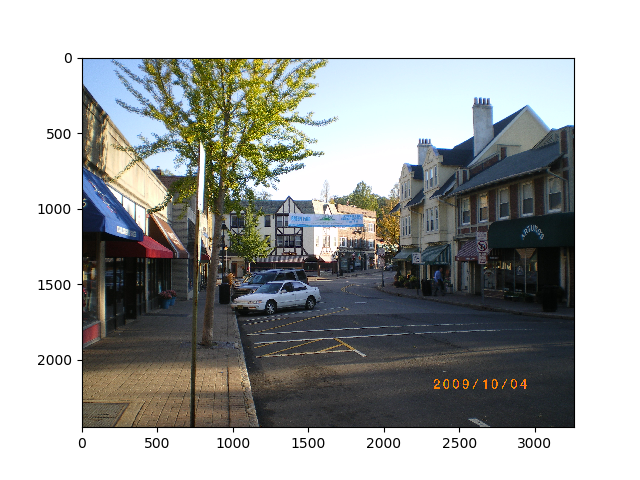

In [4]:

import numpy as np 
from numpy import linalg as LA 
import matplotlib.pyplot as plt 
from scipy import signal 

pic=plt.imread('IMGP1690.JPG') 
#or use python imagerecdisp.py from 
#Moodle2 to capture an image
plt.imshow(pic) 
plt.show()

<p style="line-height:1.5">
<font size="6">Now convert it to the (2 dimensional) luminance component y,
Y= 0.299R + 0.587 G + 0.114 B
(library pyplot has R at index 0):
   
</font></p>   

<IPython.core.display.Javascript object>


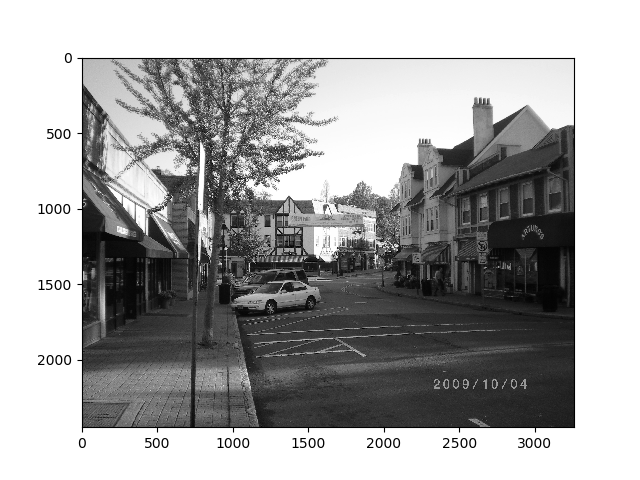

In [5]:
Y=0.299*pic[:,:,0]+0.587*pic[:,:,1]+0.114*pic[:,:,2] 
Y.shape 
#(2448, 3264) 
plt.figure()
plt.imshow(Y,cmap='gray') 
plt.show()

<p style="line-height:1.5">
<font size="6">
meaning we have 2448 rows and 3264 columns.<br>
Now we construct the matrix $x$, for blocks of size N=4. The dimension of this matrix is 4 columns and  2448*3264/4=1997568 rows.
We use the command "reshape", which reads out a matrix column wise and puts this in a new matrix with given dimension: 
    
```reshape (Y, SIZE)```

Since reshape reads out the values column wise, we need to transpose the matrices to read out the rows with length 4:
   
</font></p>   

In [6]:
x=np.reshape(Y,(-1,4), order='C') 

x.shape 
#(1997568, 4)


(1997568, 4)

<p style="line-height:1.5">
<font size="6">So here we see that it has the correct size. Next we can compute the autocorrelation matrix <br>
    $\boldsymbol A_{xx}=\boldsymbol x^T \cdot \boldsymbol x $,<br>
   
</font></p>   


In [7]:
Axx=np.dot(x.T,x) 

Axx.shape 
# (4, 4)


(4, 4)

<p style="line-height:1.5">
<font size="6">Here we now have the autocorrelation matrix with the correct size (4x4).<br>
Now we can compute the eigenvectors and eigenvalues.<br> 
To obtain the eigenvectors we use the command "eig" in Python: 


```Lambda, T = LA.eig (Axx)```
where T contains the eigenvectors as column vectors.
   
</font></p>   

In [8]:
Lambda, T = LA.eig(Axx) 
print ("Lambda = ", Lambda)
print(" " )
print ("T = ", T)

Lambda =  [1.42784671e+11 5.55308999e+08 8.99729347e+07 1.67602258e+07]
 
T =  [[ 0.49948135  0.6365355   0.50796674 -0.2954839 ]
 [ 0.50058005  0.30243409 -0.49937846  0.63919824]
 [ 0.50049483 -0.2928952  -0.49949024 -0.64360456]
 [ 0.49944261 -0.64619547  0.49305218  0.29981335]]


<p style="line-height:1.5">
<font size="6">**Observe:** If several of you used different images, they are still resulting in very similar   KLT matrices T!<br> 
Since this is a 4x4 transform matrix, we obtain 4 **subband** filters with 4 **impulse** responses. We can now also plot the 4 **impulse responses** of our KLT,
   
</font></p>   

<IPython.core.display.Javascript object>


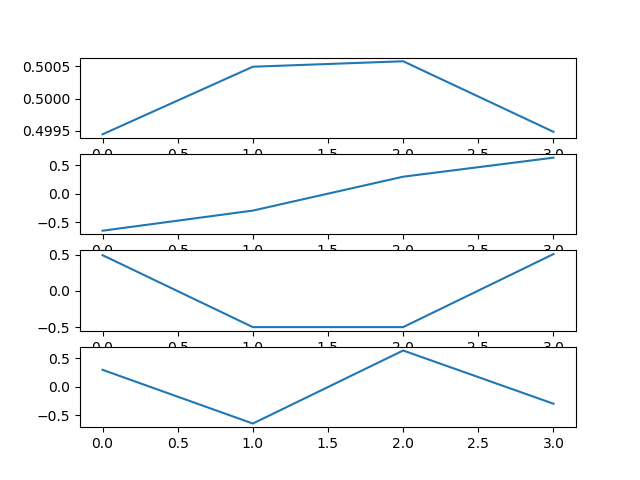

In [9]:

plt.figure() 
for k in range(0,4): 
    plt.subplot(4,1,k+1) 
    plt.plot(np.flipud(T[:,k]))

plt.show()

<p style="line-height:1.5">
<font size="6">(x-axis is sample, y axis is value)<br>
    
Observe that it looks like filters with increasingly higher (lower) frequencies, on top is a low pass filter, below that a band pass, then another band pass, then a high pass. So simply by starting with a natural image has lead us to a subband decomposition, where we divide our frequency domain into different subbands! This also has some similarity to the DCT, and this is why a DCT works.
<br><br>
The **frequency responses** of these filters are
   
</font></p>   

<IPython.core.display.Javascript object>


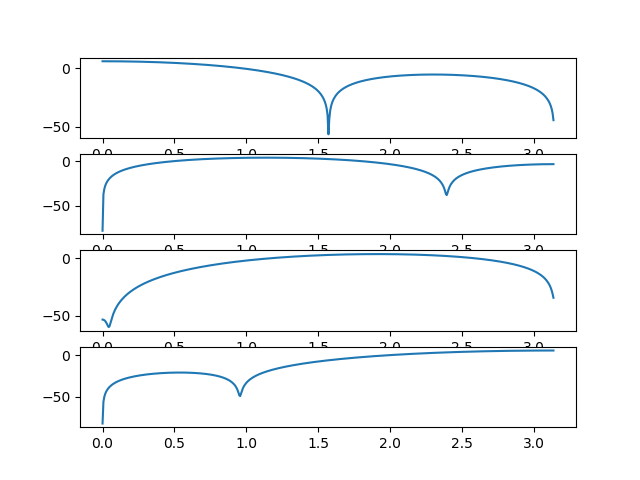

In [10]:
plt.figure() 

for k in range(0,4): 
    w,frresp=signal.freqz(T[:,k]) 
    plt.subplot(4,1,k+1) 
    plt.plot(w,20*np.log10(abs(frresp))) 

plt.show()   


<p style="line-height:1.5">
<font size="6">(x-axis is frequency, y-axis is attenuation)<br>
Observe that the horizontal axis shows the  normalized frequencies between 0 and pi. 
 <br><br>
Again we can see that the top figure shows a low pass filter, below two band pass filters, and at the bottom a high pass filter.
<br><br>
Now we can **verify** that the resulting **subbands** for the rows are indeed **uncorrelated** or orthogonal to each other. We compute the row-subbands with our KLT,
<br>
   
</font></p>   


In [11]:
yr=np.dot(x,T) 

yr.shape 
#(1997568, 4)


(1997568, 4)

<p style="line-height:1.5">
<font size="6">Observe: each column of yr represents a subband (we have 4 subbands, each with 1997568 samples).
<br><br>
Next compute the correlations between the subbands:
<br>
       
</font></p>   

In [12]:
np.dot(yr.T,yr) 


array([[ 1.42784671e+11,  1.41536204e-05,  4.23231229e-05,
         1.32289533e-04],
       [ 1.41536204e-05,  5.55308999e+08,  6.81752398e-05,
         1.00434949e-06],
       [ 4.23231229e-05,  6.81752398e-05,  8.99729347e+07,
        -4.79970934e-05],
       [ 1.32289533e-04,  1.00434949e-06, -4.79970934e-05,
         1.67602258e+07]])

<p style="line-height:1.5">
<font size="6">Here we can see that the diagonal elements are of **significant size** (the autocorrelations of the subbands) , and the off-diagonal elements are of **insignificant size** (the cross-correlations), for all practical purposes they can be neglected. This can also be seen by looking at the ratio of the larger and smaller values. We have a ratio of about $10^{11} / 10^{-5}=10^{16}$. This is roughly the **computational accuracy** of Python and corresponds to 160dB in power! (Since autocorrelation corresponds to a power). This is much more than the attenuation of our filters, and hence can be neglected.<br><br> 
This means the subbands are indeed uncorrelated or orthogonal to each other, and the KLT indeed works!<br>
 <br>
Next we still need to compute the KLT for the **columns**,
   
</font></p>   

In [13]:
xc=np.reshape(Y.T,(-1,4), order='C') 
print("shape of xc=",xc.shape)
print(" ")
Axxc=np.dot(xc.T,xc) 
print("shape of Axxc=",Axxc.shape) 
#(4, 4) 
Lambdac, Tc = LA.eig(Axxc) 
print(" ")
print("Lambdac=",Lambdac) 
print(" ")
print("Tc=",Tc)


shape of xc= (1997568, 4)
 
shape of Axxc= (4, 4)
 
Lambdac= [1.42754781e+11 5.64623050e+08 1.08128448e+08 1.91805744e+07]
 
Tc= [[ 0.49978497  0.62896883  0.5187165  -0.29248314]
 [ 0.50054483  0.31401957 -0.51106369  0.62422791]
 [ 0.5004281  -0.2980754  -0.48749115 -0.65044227]
 [ 0.49924099 -0.64570967  0.48176703  0.31893257]]



<p style="line-height:1.5">
<font size="6">
    Compare it with the KLT for the rows,

</font></p>  

In [14]:
T 


array([[ 0.49948135,  0.6365355 ,  0.50796674, -0.2954839 ],
       [ 0.50058005,  0.30243409, -0.49937846,  0.63919824],
       [ 0.50049483, -0.2928952 , -0.49949024, -0.64360456],
       [ 0.49944261, -0.64619547,  0.49305218,  0.29981335]])

<p style="line-height:1.5">
<font size="6">We can see that the KLT's for the rows and the columns are almost identical for this picture.<br>
The slight differences or similarities can also be seen from the correlation matrices for the rows and columns,

</font></p>  

In [15]:
print("Axx= ",Axx)
print(" ")
print("Axxc= ",Axxc) 


Axx=  [[3.58718283e+10 3.57814219e+10 3.55712586e+10 3.54120239e+10]
 [3.57814219e+10 3.58591153e+10 3.57393042e+10 3.55702733e+10]
 [3.55712586e+10 3.57393042e+10 3.58438853e+10 3.57713719e+10]
 [3.54120239e+10 3.55702733e+10 3.57713719e+10 3.58718839e+10]]
 
Axxc=  [[3.59121064e+10 3.57915705e+10 3.55743419e+10 3.54151155e+10]
 [3.57915705e+10 3.58579068e+10 3.57244755e+10 3.55360585e+10]
 [3.55743419e+10 3.57244755e+10 3.58338124e+10 3.57443289e+10]
 [3.54151155e+10 3.55360585e+10 3.57443289e+10 3.58428872e+10]]



<p style="line-height:1.5">
<font size="6">To apply these **KLT's** to transform an image, we first divide it into blocks $\boldsymbol B$ of size 4x4 (in this case) and then transform each block with the KLT for the columns $\boldsymbol T_c$ and for the rows $\boldsymbol T$,
in the encoder with,

<br>
$$\boldsymbol y= \boldsymbol T_c ^T \cdot \boldsymbol B \cdot \boldsymbol T$$
In the decoder we get the inverse operations,<br>
$$\boldsymbol B= \boldsymbol T_c^{-T} \cdot \boldsymbol y \cdot \boldsymbol T^{-1}$$
Since we know that the KLT matrix consists of the eigenvectors of a symmetric matrix (our correlation matrix), we know that these eigenvectors are orthogonal to each other, and hence the **inverse is identical to the transpose**, as we can see trying it out,

</font></p>  

In [28]:
LA.inv(T)-T.T 


array([[ 1.11022302e-16,  2.22044605e-16,  2.22044605e-16,
         1.11022302e-16],
       [ 1.56541446e-14, -2.00395256e-14, -2.33146835e-15,
         6.99440506e-15],
       [ 1.67643677e-14,  1.77635684e-15, -1.60982339e-15,
        -1.70974346e-14],
       [-1.29340982e-14, -1.11022302e-16,  7.88258347e-15,
         5.16253706e-15]])

<p style="line-height:1.5">
<font size="6">Here we see the difference between the inverse and the transpose is zero up the the computational accuracy of Python. <br>
Hence we can replace the inversion with a transposition, which is much simpler to compute,
$$\boldsymbol B = \boldsymbol T_c^{-T} \cdot \boldsymbol y \cdot \boldsymbol T^{-1}=\boldsymbol T_c \cdot \boldsymbol y \cdot \boldsymbol T^T$$
This is now the equation for the decoder.

</font></p>



<font size="8" color ="Brown"><center>
## The Discrete Cosine Transform (DCT)
        
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">
Instead of a KLT, usually a DCT is used. If we look at the DCT transform matrix, we can see that it has some similarity to the KLT of usual natural pictures. This means that the DCT gives us similar compression performance as the KLT, but it has fixed matrix elements which can be standardized, and it has a fast implementation. For those reasons it is usually adopted in video coding standards.<br>
There are actually several types of DCT, and the most commonly used for image and video coding is the so-called DCT **Type 2**. It is defined with its transform as
<br>
$$y_k=c_k \sqrt{\frac {2} {N}} \sum _{n=0} ^ {N-1} x(n)  \cos(\frac{\pi}  {N} (n+0.5)k)$$
    <br>
where $c_0=\sqrt{0.5}$, and $ c_k=1$ for $k>0$, with $k=0, ...,N-1 $ Here $n$, is our space or time index, and $k$ is our frequency index. Both run from 0 to N-1, such that we obtain a square transform matrix $\boldsymbol T$ of size NxN, with elements
<br>
$$y_k=c_k \sqrt{\frac {2} {N}}   \cos(\frac{\pi}  {N} (n+0.5)k)$$
    <br>

Observe that the **space index** n has the **shift of 0.5**, but not the frequency index k.<br>
This is the characteristic of the DCT of type 2. It is the most commonly used type in video and image coding, because the higher bands have **zeros** of their frequency response at **DC** (what we also saw at the KLT), hence **suppressing** the high **DC energy** of usual pictures for the higher subbands sufficiently. This is important for a good coding gain. In this way we don't have to encode the DC energy in higher subbands again.<br>
The DCT matrix is designed such that it is orthonormal, which means its inverse is identical to its transpose,
<br>
$$
\boldsymbol T^{-1}=\boldsymbol T^{T}
$$
This automatically also means that it is invertible (by using its transpose), which is important for the decoder, were we would like to reconstruct the original blocks of our image.
Observe that we decompose the image into smaller blocks to obtain a **time(space) / frequency decomposition**. We reduce the spacial resolution to the size of our blocks, but for that we obtain frequency information within each block. We can say in which block a certain frequency appears. In this way we obtain a different representation of our image, where we can take advantage of the frequency information, for instance to use that most energy is expected at low frequencies, or that the eye has the highest sensitivity at the lower frequencies. Hence we will put most of our bits into representing the low frequencies, and very few bits into the higher frequencies.
</font></p>


<font size="8" color ="Brown"><center>
## Python Example for the DCT

        
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">
   We again assume a number of subbands of N=4. We generate our transform matrix T,
</font></p>

In [33]:
N=4;
T=np.zeros((N,N))
for k in range(4):
  for n in range(4):          
    T[n,k]=np.cos(np.pi/N*(n+0.5)*(k))*np.sqrt(2.0/N);
 
T[:,0]=T[:,0]*np.sqrt(0.5)
T 


array([[ 0.5       ,  0.65328148,  0.5       ,  0.27059805],
       [ 0.5       ,  0.27059805, -0.5       , -0.65328148],
       [ 0.5       , -0.27059805, -0.5       ,  0.65328148],
       [ 0.5       , -0.65328148,  0.5       , -0.27059805]])

<p style="line-height:1.5">
<font size="6">
We check if our computed matrix is indeed orthonormal, as it should be, by checking if $\boldsymbol T . \boldsymbol T^{T}=\boldsymbol I$ is the identity,
</font></p>

In [34]:
np.dot(T,T.T)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 1.00000000e+00, 1.11022302e-16, 2.49800181e-16],
       [0.00000000e+00, 1.11022302e-16, 1.00000000e+00, 2.77555756e-17],
       [1.38777878e-17, 2.49800181e-16, 2.77555756e-17, 1.00000000e+00]])

<p style="line-height:1.5">
<font size="6">
We see it is indeed the identity matrix, with the ones on the diagonal, and practically zeros on the off-diagonals.
Now we can also plot the impulse responses and the frequency responses of its 4 **equivalent filters**, as we did for the KLT,

</font></p>  

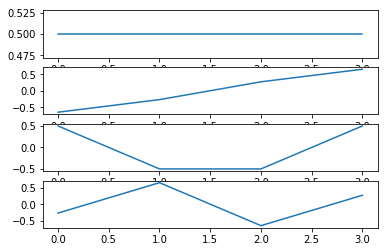

In [31]:
plt.figure() 
for k in range(0,4): 
    plt.subplot(4,1,k+1) 
    plt.plot(np.flipud(T[:,k]))

plt.show()

<p style="line-height:1.5">
<font size="6">
    These are now the impulse responses of our 4 equivalent DCT filters.<br>
Compare them with the KLT,
    
</font></p>  

<p style="line-height:1.5">
<font size="6">
    
![Lecture8-5.png](Img-Lecture8\Lecture8-5.png)
Observe that both are indeed quite similar.<br>
Now we can also plot the frequency responses for the DCT equivalent filters,
<br>

</font></p>  


c:\python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


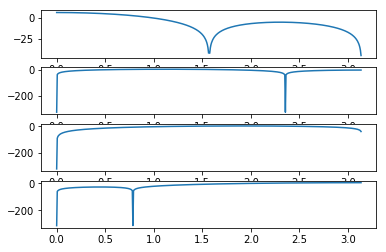

In [35]:
for k in range(0,4): 
    w,frresp=signal.freqz(T[:,k]) 
    plt.subplot(4,1,k+1) 
    plt.plot(w,20*np.log10(abs(frresp))) 
plt.show()




        
<p style="line-height:1.5">
<font size="6">
The DCT equivalent filter frequency responses.
<br><br>
Observe that this is again like subbands of a filter bank, with a low pass on top, below that band pass filters with increasing center frequency, and then a high pass. Also observe that except for the low pass filter, the higher filters have all zeros (the transfer function is zero in the linear scale) , meaning **infinite attenuation** (-infinity dB in the dB scale), at **frequency zero**, meaning **DC**! This is important because natural images often have a lot of energy around DC, and this keeps it out of the higher filters, to save bits.<br><br> 
Again quite similar to the KLT,<br>
    
    
![Lecture8-6.png](Img-Lecture8\Lecture8-5.png)
The KLT frequency responses as a comparison.
<br><br>
Observe that the DCT makes no difference for rows and columns, hence it is the same for both sides, we make no difference between $\boldsymbol T_c$ and $\boldsymbol T$.
To transform our image, with blocks $\boldsymbol B$, in the encoder we use
<br>
$$\boldsymbol Y= \boldsymbol T^T . \boldsymbol B . \boldsymbol T$$
and in the decoder we use
<br>
$$\boldsymbol B= \boldsymbol T . \boldsymbol Y . \boldsymbol T^T$$

</font></p>  


<font size="8" color ="Brown"><center>
## Walsh-Hadamard Transform (WHT)
     
<center></font>
<br>

<p style="line-height:1.5">
<font size="6">
There is another interesting transform for images and video, and that is the so-called Walsh-Hadamard transform. It is defined as,
<br>
    
$$ H_1:=\frac {1} {\sqrt{2}} \left[ \matrix{1 & 1 \\ 1 & -1} \right]$$    
It is extended to higher order with
<br>

$$
H_m:=\frac{1} { \sqrt{2}} \left[ \matrix{H_{m-1} & H_{m-1} \\ H_{m-1} & -H_{m-1}} \right]
$$
Here we can see that this matrix only consists of +/-1, which means a transform needs **no multiplications**, only sign changes! The factors with $\sqrt{2}$ are for making the transform orthonormal, they are not necessarily needed for an implementation. This makes it very computationally efficient!<br><br>
But since the matrix entries are now less similar to a KLT, the compression performance is usually not as high as with a DCT (at least for usual images). Remember the KLT depends on the image, and there might be (e.g. artificial) images where the KLT becomes more similar to a WHT.<br><br>
Observe that it also has similarity to a DCT where you only keep the signs (sgn(T)).
</font></p>  